In [1]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

# Scatterplotting

In [2]:
df=pd.read_csv('big_df_allvars.csv')  
df["w_neighs"]=np.where(df['gene'] == "-", np.NaN, df['w_neighs'])

In [3]:
df.iloc[df['ph_mean'].idxmax()] 

index                     38467
ch               NW_022145612.1
pos                      374044
gene                  LOC580371
ph_mean                  358.86
ph_var                 0.054769
temp_mean                6.8095
temp_var                 12.936
ph_freq                  14.401
ch_num                        1
idx                        5216
log_ph_mean             2.55493
log_ph_var             -1.26147
log_temp_mean          0.833115
log_temp_var             1.1118
log_ph_freq             1.15839
neighs                      748
w_neighs                      0
centr                  0.033493
exp_level                 17119
snp_count                     6
Name: 31638, dtype: object

In [3]:
genes=df.gene.unique()
genes = genes[genes!='-'] 

In [4]:
names = [x for x in df.columns]
new_df = pd.DataFrame(columns=names)

In [5]:
#i=1
for g in genes:
    temp_df = df[df["gene"]==g]
    maxu=temp_df[["ph_mean","temp_mean","temp_var","ph_freq"]].values.max(1)
    new_df = new_df.append(temp_df.iloc[[np.where(maxu==maxu.max())[0][0]]]) 
    #i+=1
    #print(i)

In [6]:
new_df

,index,ch,pos,gene,ph_mean,ph_var,temp_mean,temp_var,ph_freq,ch_num,...,log_ph_mean,log_ph_var,log_temp_mean,log_temp_var,log_ph_freq,neighs,w_neighs,centr,exp_level,snp_count
0,28119,NW_022145612.1,50053666,LOC100888473,0.170780,0.056826,0.082051,0.100290,0.088500,1,...,-0.767563,-1.245453,-1.085916,-0.998742,-1.053057,0,0.0,NaN,NaN,2.0
28114,58778,NW_022145612.1,48652184,LOC582475,0.413070,0.085476,1.471600,0.181120,0.262610,1,...,-0.383976,-1.068156,0.167790,-0.742034,-0.580689,0,0.0,NaN,NaN,10.0
28124,8483,NW_022145612.1,48730374,LOC764414,0.123960,0.354700,0.088905,0.245530,1.719900,1,...,-0.906718,-0.450139,-1.051074,-0.609895,0.235503,0,0.0,NaN,NaN,17.0
28143,28074,NW_022145612.1,48805050,LOC579746,0.032518,0.215860,0.032040,0.068156,0.212980,1,...,-1.487876,-0.665828,-1.494307,-1.166496,-0.671661,0,0.0,NaN,NaN,11.0
28148,16935,NW_022145612.1,49037357,LOC578743,0.046912,0.105990,0.039127,0.325090,0.121060,1,...,-1.328716,-0.974735,-1.407523,-0.487996,-0.916999,0,0.0,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61501,31039,NW_022145567.1,519604,LOC100890715,0.037263,0.043926,0.041913,0.040002,0.044426,86,...,-1.428722,-1.357278,-1.377651,-1.397918,-1.352363,0,0.0,NaN,NaN,1.0
61502,50406,NW_022145555.1,717279,LOC115918890,0.032587,0.159620,0.038413,0.064004,0.091424,87,...,-1.486956,-0.796913,-1.415522,-1.193793,-1.038940,0,0.0,NaN,NaN,1.0
61503,11090,NW_022145518.1,223420,LOC764237,0.128910,0.071184,0.055876,0.045872,0.042086,88,...,-0.889713,-1.147618,-1.252775,-1.338452,-1.375862,430,0.0,0.019254,8997.0,1.0
61504,42046,NW_022145489.1,14494,LOC594069,0.057185,0.032531,0.045991,0.101380,0.035645,89,...,-1.242718,-1.487703,-1.337327,-0.994048,-1.448001,0,0.0,NaN,NaN,1.0


In [113]:
ndf=new_df[["ph_mean","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]

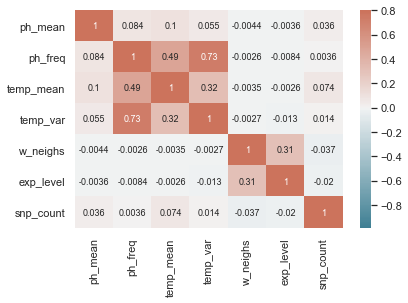

In [114]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

ax = sns.heatmap(ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

No log, no norm

In [115]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
normalized_df=ndf.copy()

In [116]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
normalized_df["w_neighs"]=(normalized_df["w_neighs"]-normalized_df["w_neighs"].mean())/normalized_df["w_neighs"].std()
normalized_df["exp_level"]=(normalized_df["exp_level"]-normalized_df["exp_level"].mean())/normalized_df["exp_level"].std()
normalized_df["snp_count"]=(normalized_df["snp_count"]-normalized_df["snp_count"].mean())/normalized_df["snp_count"].std()

normalized_df["ph_mean"]=(normalized_df["ph_mean"]-normalized_df["ph_mean"].mean())/normalized_df["ph_mean"].std()
normalized_df["ph_freq"]=(normalized_df["ph_freq"]-normalized_df["ph_freq"].mean())/normalized_df["ph_freq"].std()
normalized_df["temp_mean"]=(normalized_df["temp_mean"]-normalized_df["temp_mean"].mean())/normalized_df["temp_mean"].std()
normalized_df["temp_var"]=(normalized_df["temp_var"]-normalized_df["temp_var"].mean())/normalized_df["temp_var"].std()




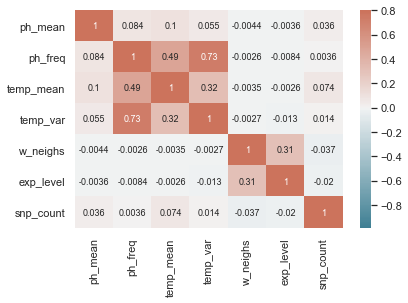

In [117]:
ax = sns.heatmap(normalized_df.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

No log, norm

In [118]:
ndf[['log_ph_freq', "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']] = np.log(ndf[["ph_freq", "ph_mean", "temp_mean", "temp_var",'w_neighs', 'exp_level', 'snp_count']].replace(0, np.nan))
log_ndf=ndf[["log_ph_freq", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


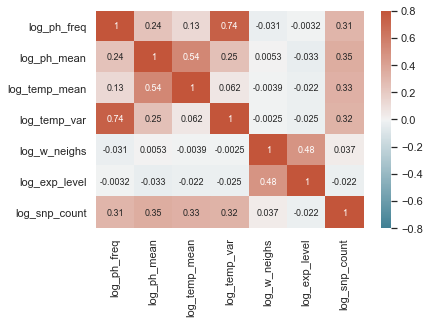

In [119]:
ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.8, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

Log, no norm

In [14]:
#normalized_df[['log_ph_freq', "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']] = np.log(normalized_df[["ph_freq", "ph_var", "ph_mean", "temp_mean", "temp_var",'w_neighs', 'exp_level', 'snp_count']].replace(0, np.nan))
#log_ndf=normalized_df[["log_ph_freq", "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

In [15]:
#ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

In [124]:
sub=log_ndf[['log_ph_freq', "log_ph_mean", "log_temp_mean", "log_temp_var", 'log_snp_count']]
sub=sub.dropna()
for s in ['log_ph_freq', "log_ph_mean", "log_temp_mean", "log_temp_var"]:
    x = sub[s].to_numpy()
    x = x.reshape((-1, 1))
    y = sub['log_snp_count'].to_numpy()
    reg = LinearRegression().fit(x,y)
    print(reg.score(x, y)) #R squared
    print(reg.coef_) #slope

0.09744454490825949
[0.27483394]
0.12293452533274984
[0.32440412]
0.11184517470771738
[0.29850627]
0.10169264640233167
[0.27733891]


In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])

<AxesSubplot:xlabel='log_temp_mean', ylabel='log_snp_count'>

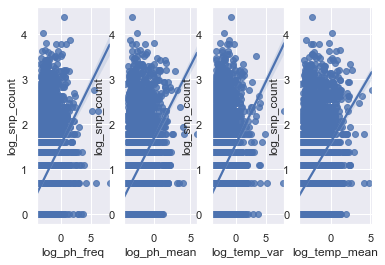

In [126]:
fig, axs = plt.subplots(ncols=4)
sns.regplot(x='log_ph_freq',y='log_snp_count',data=sub,ax=axs[0] )
sns.regplot(x='log_ph_mean',y='log_snp_count',data=sub,ax=axs[1] )
sns.regplot(x='log_temp_var',y='log_snp_count',data=sub,ax=axs[2] )
sns.regplot(x='log_temp_mean',y='log_snp_count',data=sub,ax=axs[3] )

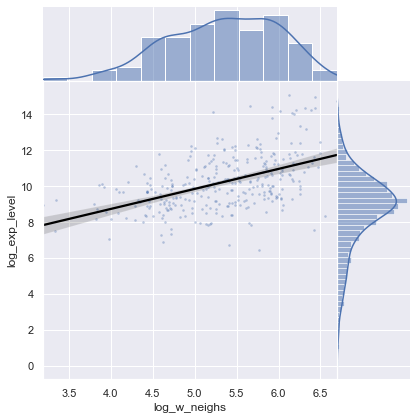

In [21]:
sns.jointplot(
    x='log_w_neighs', 
    y='log_exp_level', 
    data=log_ndf,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

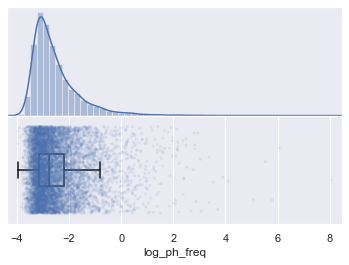

In [22]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    log_ndf['log_ph_freq'], 
    ax=axs[0]
)
sns.stripplot(
    log_ndf['log_ph_freq'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.1
)
sns.boxplot(
    log_ndf['log_ph_freq'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
    color=".05"
)

# Align axes
spacer = np.max(log_ndf['log_ph_freq']) * 0.05
xmin = np.min(log_ndf['log_ph_freq']) - spacer
xmax = np.max(log_ndf['log_ph_freq']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

In [23]:
#log_ndf=ndf[["log_ph_freq", "log_ph_var", "log_ph_mean", "log_temp_mean", "log_temp_var",'log_w_neighs', 'log_exp_level', 'log_snp_count']]

In [24]:
#normalized_df=(ndf-ndf.mean())/ndf.std()
#log_ndf["log_w_neighs"]=(log_ndf["log_w_neighs"]-log_ndf["log_w_neighs"].mean())/log_ndf["log_w_neighs"].std()
#log_ndf["log_exp_level"]=(log_ndf["log_exp_level"]-log_ndf["log_exp_level"].mean())/log_ndf["log_exp_level"].std()
#log_ndf["log_snp_count"]=(log_ndf["log_snp_count"]-log_ndf["log_snp_count"].mean())/log_ndf["log_snp_count"].std()

#log_ndf["log_ph_mean"]=(log_ndf["log_ph_mean"]-log_ndf["log_ph_mean"].mean())/log_ndf["log_ph_mean"].std()
#log_ndf["log_ph_var"]=(log_ndf["log_ph_var"]-log_ndf["log_ph_var"].mean())/log_ndf["log_ph_var"].std()
#log_ndf["log_ph_freq"]=(log_ndf["log_ph_freq"]-log_ndf["log_ph_freq"].mean())/log_ndf["log_ph_freq"].std()
#log_ndf["log_temp_mean"]=(log_ndf["log_temp_mean"]-log_ndf["log_temp_mean"].mean())/log_ndf["log_temp_mean"].std()
#log_ndf["log_temp_var"]=(log_ndf["log_temp_var"]-log_ndf["log_temp_var"].mean())/log_ndf["log_temp_var"].std()




In [25]:
#ax = sns.heatmap(log_ndf.corr(), cmap=cmap, vmin=-0.99, vmax=.8, center=0.00, annot=True, annot_kws={"fontsize":9})

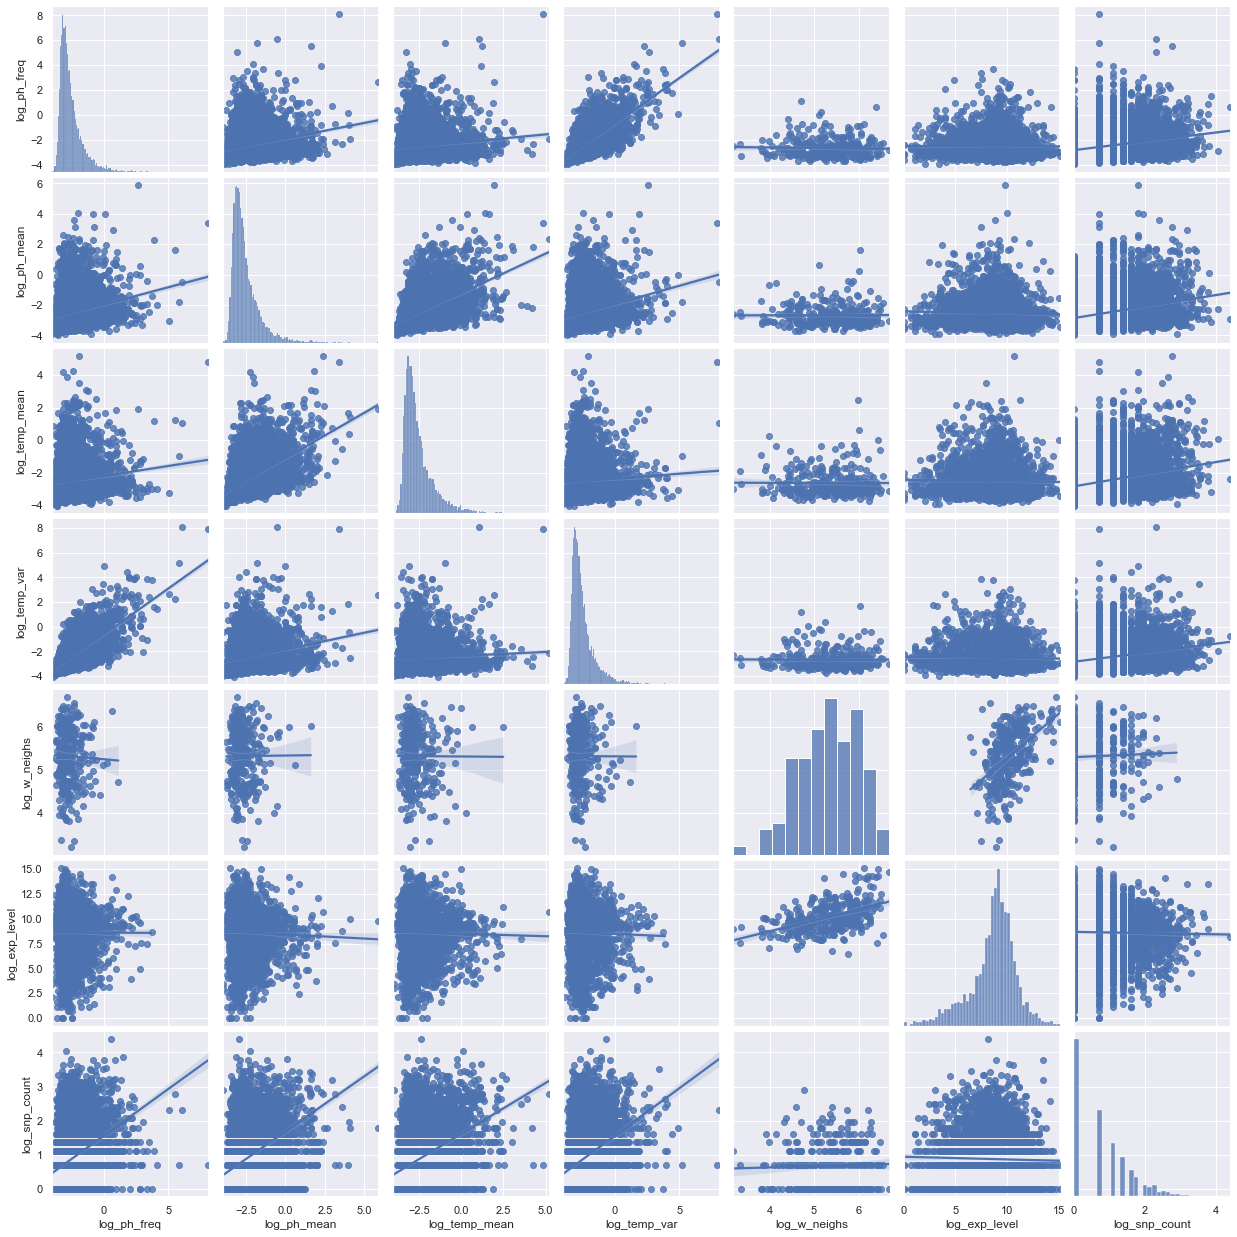

In [26]:
sns.pairplot(log_ndf, kind="reg")

In [26]:
log_ndf

,log_ph_freq,log_ph_mean,log_temp_mean,log_temp_var,log_w_neighs,log_exp_level,log_snp_count
0,-2.424753,-1.767379,-2.500414,-2.299689,NaN,NaN,0.693147
28114,-1.337085,-0.884138,0.386350,-1.708595,NaN,NaN,2.302585
28124,0.542266,-2.087796,-2.420187,-1.404336,NaN,NaN,2.833213
28143,-1.546557,-3.425961,-3.440770,-2.685956,NaN,NaN,2.397895
28148,-2.111469,-3.059482,-3.240943,-1.123653,NaN,NaN,2.197225
...,...,...,...,...,...,...,...
61501,-3.113930,-3.289754,-3.172159,-3.218826,NaN,NaN,0.000000
61502,-2.392247,-3.423842,-3.259359,-2.748810,NaN,NaN,0.000000
61503,-3.168040,-2.048641,-2.884620,-3.081900,NaN,9.104646,0.000000
61504,-3.334146,-2.861464,-3.079310,-2.288879,NaN,NaN,0.000000


# let's start with multiple linear regression model trying to predict bayenv factor

In [27]:
train, val = train_test_split(log_ndf.dropna(), test_size=0.2, random_state=42)

In [28]:
X_train = train[["log_w_neighs",'log_snp_count','log_exp_level']]
y_train = train["log_ph_mean"]

In [29]:
X_val = val[["log_w_neighs",'log_snp_count','log_exp_level',]]
y_val = val["log_ph_mean"]

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [32]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return math.sqrt(metrics.mean_squared_error(actual, predicted))

In [33]:
training_error = rmse(y_train, y_fitted)
val_error = rmse(y_val, y_predicted)
(training_error, val_error)

(0.6816390757879252, 0.5972312502361884)

/Users/csengepetak/miniconda3/envs/ds1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


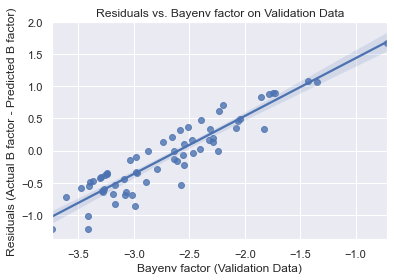

In [34]:
residuals = y_val - y_predicted
ax = sns.regplot(y_val, residuals)
ax.set_xlabel('Bayenv factor (Validation Data)')
ax.set_ylabel('Residuals (Actual B factor - Predicted B factor)')
ax.set_title("Residuals vs. Bayenv factor on Validation Data");

### We see that there is not much going on here, so we can't do a mulitple linear regression model!
Let's try classification then! (More explanation will be provided in the update)

In [35]:
ndf=new_df[["ph_mean","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]
bayenvs = ["ph_mean","temp_mean","temp_var", "ph_freq"]
for b in bayenvs:
    temp=ndf[b].to_numpy()
    score=np.percentile(temp, 90)
    ndf[b+"_cat"]=np.where((temp >= score), 'above', 'below')
ph_freq_df=ndf[["ph_freq_cat", "w_neighs", 'exp_level', 'snp_count']]

<ipython-input-35-cb5829aafc9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[b+"_cat"]=np.where((temp >= score), 'above', 'below')


In [36]:
training=ph_freq_df.copy()
training=training.dropna()

test=training.sample(n=100, random_state=1)

In [37]:
training


,ph_freq_cat,w_neighs,exp_level,snp_count
28164,below,0.0,22756.0,27.0
28190,below,0.0,75336.0,8.0
28215,below,0.0,1475.0,7.0
28243,above,0.0,840.0,4.0
28256,below,0.0,69.0,13.0
...,...,...,...,...
61472,below,0.0,1755.0,1.0
61480,below,0.0,82829.0,1.0
61493,below,0.0,15705.0,1.0
61503,below,0.0,8997.0,1.0


In [38]:
train, val = train_test_split(training, test_size=0.2, random_state=42)
X_train = train[["w_neighs","exp_level","snp_count"]].values
Y_train = train["ph_freq_cat"].values

In [39]:
model = LogisticRegression(random_state=42).fit(X_train, Y_train)
model.predict(X_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.8934953538241601


In [40]:
X_val=val[["w_neighs","exp_level","snp_count"]].values
Y_val=val["ph_freq_cat"].values

In [41]:
val_accuracy = model.score(X_val, Y_val)

print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.8971428571428571


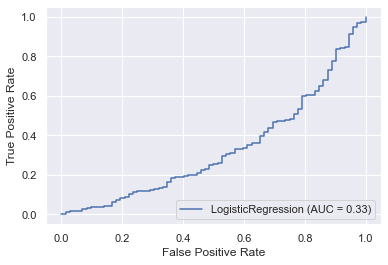

In [42]:
metrics.plot_roc_curve(model, X_val, Y_val)

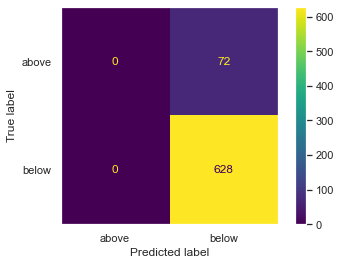

In [44]:
display=plot_confusion_matrix(model, X_val, Y_val)
plt.grid(None)

### This is because my data is very imbalanced!

You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement), or
You can delete instances from the over-represented class, called under-sampling

but it still wasn't working because now individually in the 5 bayenv there are too few examples of above. so let's try to aggregate data! and just predict if there would be a bayenv factor at all!

In [45]:
ndf=new_df[["ph_mean","ph_freq","temp_mean","temp_var", "w_neighs", 'exp_level', 'snp_count']]
bayenvs = ["ph_mean","temp_mean","temp_var", "ph_freq"]
for b in bayenvs:
    temp=ndf[b].to_numpy()
    score=np.percentile(temp, 90)
    ndf[b+"_cat"]=np.where((temp >= score), 1, 0)
#ph_mean_df=ndf[["ph_var_cat", "w_neighs", 'exp_level', 'snp_count']]

<ipython-input-45-1ae9961695be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[b+"_cat"]=np.where((temp >= score), 1, 0)


In [46]:
bayenvs=["ph_mean_cat","ph_freq_cat","temp_mean_cat", "temp_var_cat","ph_freq_cat"]

In [47]:
ndf["finals"]=np.sum(np.array([ndf[col].values for col in bayenvs] ),axis=0)>0
ndf["finals"]=ndf["finals"].apply(lambda x : 0 if x==False else 1)

<ipython-input-47-68486768c901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["finals"]=np.sum(np.array([ndf[col].values for col in bayenvs] ),axis=0)>0
<ipython-input-47-68486768c901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["finals"]=ndf["finals"].apply(lambda x : 0 if x==False else 1)


In [48]:
training=ndf.copy()
training=training.dropna()

In [49]:
aboves=training[training["finals"]==1]

In [50]:
belows=training[training["finals"]==0].sample(n=len(aboves), random_state=1)

In [51]:
new_train = pd.concat([belows,aboves])

In [52]:
#normalise between 0-1

In [53]:
new_train["w_neighs"]=new_train["w_neighs"].apply(lambda x: (x-new_train["w_neighs"].min())/(new_train["w_neighs"].max()-new_train["w_neighs"].min()))

In [54]:
new_train["exp_level"]=new_train["exp_level"].apply(lambda x: (x-new_train["exp_level"].min())/(new_train["exp_level"].max()-new_train["exp_level"].min()))

In [55]:
new_train["snp_count"]=new_train["snp_count"].apply(lambda x: (x-new_train["snp_count"].min())/(new_train["snp_count"].max()-new_train["snp_count"].min()))


In [56]:
new_train

,ph_mean,ph_freq,temp_mean,temp_var,w_neighs,exp_level,snp_count,ph_mean_cat,temp_mean_cat,temp_var_cat,ph_freq_cat,finals
47358,0.032692,0.043408,0.068890,0.034313,0.000000,0.000300,0.0000,0,0,0,0,0
32808,0.145760,0.049671,0.140600,0.059637,0.000000,0.000691,0.0375,0,0,0,0,0
45745,0.054079,0.036838,0.067438,0.069515,0.720361,0.014890,0.0000,0,0,0,0,0
59980,0.037444,0.072516,0.036718,0.047480,0.000000,0.001152,0.0125,0,0,0,0,0
35640,0.093607,0.043824,0.055410,0.054185,0.000000,0.011765,0.0250,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61141,0.074137,0.085410,0.057414,0.470220,0.604871,0.119337,0.0375,0,0,1,0,1
61153,0.321660,0.031485,0.255990,0.032206,0.000000,0.001434,0.0125,1,0,0,0,1
61199,0.137480,0.251100,0.270940,0.468340,0.000000,0.005184,0.0375,0,1,1,1,1
61398,0.120680,0.034763,0.387330,0.036498,0.000000,0.021503,0.0000,0,1,0,0,1


In [57]:
test=new_train.sample(n=100, random_state=1)

In [58]:
train, val = train_test_split(new_train, test_size=0.1, random_state=42)
X_train = train[["snp_count","exp_level","w_neighs"]].values
Y_train = train["finals"].values

In [59]:
model = LogisticRegression(random_state=42).fit(X_train, Y_train)
model.predict(X_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.683184855233853


In [60]:
model.coef_

array([[ 8.59180356,  0.16607679, -1.08625079]])

In [61]:
X_val=val[["snp_count","exp_level","w_neighs"]].values
Y_val=val["finals"].values

In [62]:
val_accuracy = model.score(X_val, Y_val)

print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.68


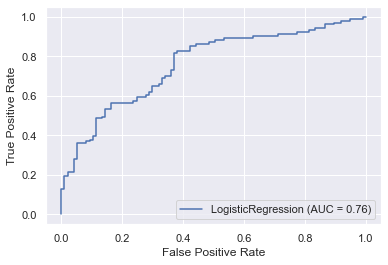

In [63]:
metrics.plot_roc_curve(model, X_val, Y_val)

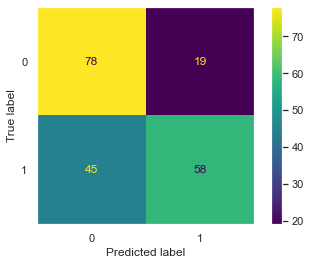

In [64]:
display=plot_confusion_matrix(model, X_val, Y_val)
plt.grid(None)

In [ ]:
# pretty sajt...
#well then it seems that you cannot predict LINEARLY the label given the inputs

# KNeighbors

In [66]:
X = new_train[["exp_level","snp_count","w_neighs"]].values
y = new_train["finals"].values

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [70]:
y_pred = classifier.predict(X_test)

In [76]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  60]
 [ 66 134]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       200
           1       0.69      0.67      0.68       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.68       400
weighted avg       0.69      0.69      0.68       400



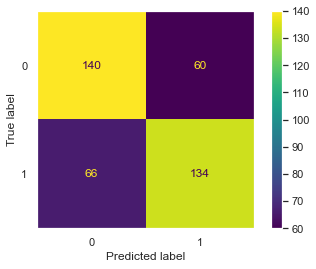

In [75]:
display=plot_confusion_matrix(classifier, X_test, y_test)
plt.grid(None)

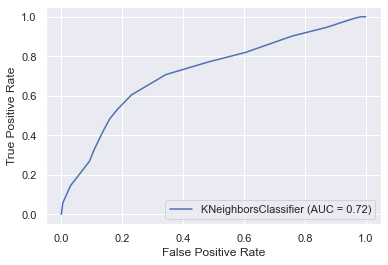

In [104]:
metrics.plot_roc_curve(classifier, X_test, y_test)

In [105]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

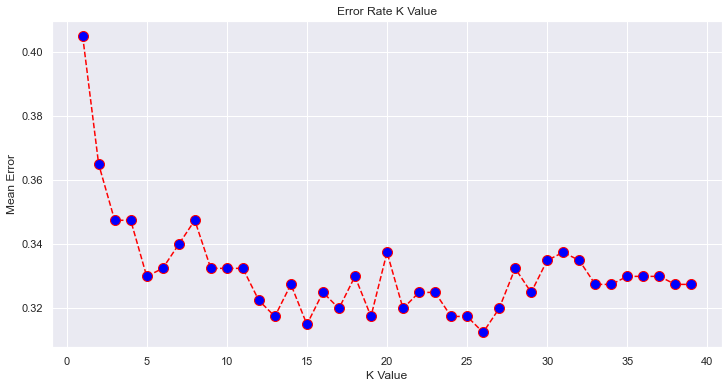

In [106]:
#plt.figure(figsize=(12, 6))
#plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

# PCA

In [107]:
# Separating out the features

x = new_train[["exp_level","snp_count","w_neighs"]].values# Separating out the target
y = new_train["finals"].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [108]:
x

array([[-0.21470455, -0.67259388, -0.26725418],
       [-0.20601599, -0.02809202, -0.26725418],
       [ 0.10896913, -0.67259388,  5.27410005],
       ...,
       [-0.10635351, -0.02809202, -0.26725418],
       [ 0.25569462, -0.67259388, -0.26725418],
       [-0.20368157, -0.67259388, -0.26725418]])

In [109]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [110]:
finalDf = pd.concat([principalDf, training[['finals']].reset_index().drop("index",axis=1)], axis = 1)

In [111]:
finalDf

,principal component 1,principal component 2,finals
0,-0.194315,-0.718950,1
1,-0.322057,-0.091366,0
2,3.907943,-0.309766,1
3,-0.225966,-0.506026,1
4,-0.109725,-0.242645,1
...,...,...,...
3493,NaN,NaN,0
3494,NaN,NaN,0
3495,NaN,NaN,0
3496,NaN,NaN,0


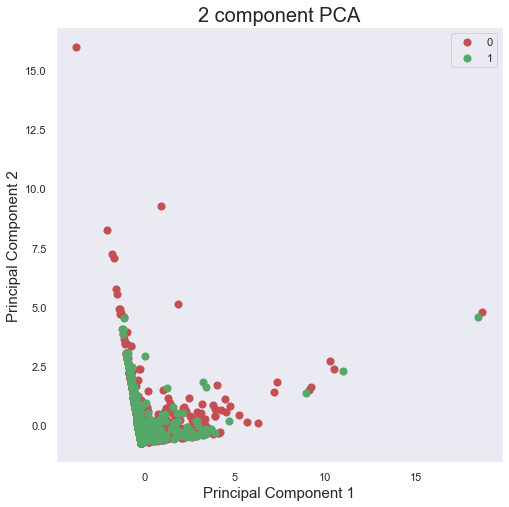

In [112]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['finals'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Support Vector Machine

In [101]:
X = new_train[["exp_level","snp_count","w_neighs"]].values
y = new_train["finals"].values

In [102]:
new_train

,ph_mean,ph_freq,temp_mean,temp_var,w_neighs,exp_level,snp_count,ph_mean_cat,temp_mean_cat,temp_var_cat,ph_freq_cat,finals
47358,0.032692,0.043408,0.068890,0.034313,0.000000,0.000300,0.0000,0,0,0,0,0
32808,0.145760,0.049671,0.140600,0.059637,0.000000,0.000691,0.0375,0,0,0,0,0
45745,0.054079,0.036838,0.067438,0.069515,0.720361,0.014890,0.0000,0,0,0,0,0
59980,0.037444,0.072516,0.036718,0.047480,0.000000,0.001152,0.0125,0,0,0,0,0
35640,0.093607,0.043824,0.055410,0.054185,0.000000,0.011765,0.0250,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61141,0.074137,0.085410,0.057414,0.470220,0.604871,0.119337,0.0375,0,0,1,0,1
61153,0.321660,0.031485,0.255990,0.032206,0.000000,0.001434,0.0125,1,0,0,0,1
61199,0.137480,0.251100,0.270940,0.468340,0.000000,0.005184,0.0375,0,1,1,1,1
61398,0.120680,0.034763,0.387330,0.036498,0.000000,0.021503,0.0000,0,1,0,0,1


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [104]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [105]:
y_pred = svclassifier.predict(X_test)

In [106]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[184   9]
 [144  63]]
              precision    recall  f1-score   support

           0       0.56      0.95      0.71       193
           1       0.88      0.30      0.45       207

    accuracy                           0.62       400
   macro avg       0.72      0.63      0.58       400
weighted avg       0.72      0.62      0.57       400



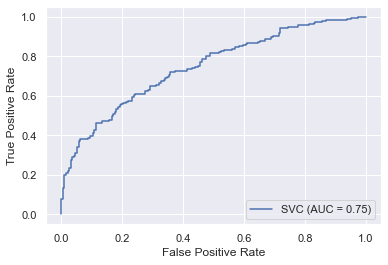

In [107]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)

In [108]:
#svclassifier = SVC(kernel='poly', degree=5)
#print(1)
#svclassifier.fit(X_train, y_train)
#print(2)
#y_pred = svclassifier.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [109]:
svclassifier = SVC(kernel='rbf')
print(1)
svclassifier.fit(X_train, y_train)
print(2)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1
2
[[158  35]
 [ 93 114]]
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       193
           1       0.77      0.55      0.64       207

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.70      0.68      0.67       400



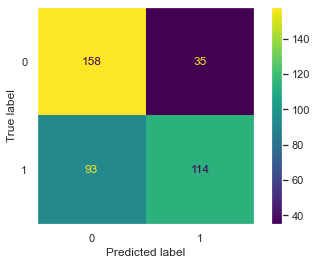

In [110]:
display=plot_confusion_matrix(svclassifier, X_test, y_test)
plt.grid(None)

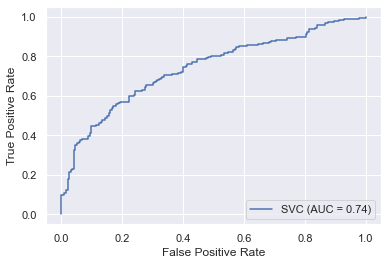

In [111]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)

In [120]:
svclassifier = SVC(kernel='sigmoid')
print(1)
svclassifier.fit(X_train, y_train)
print(2)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1
2
[[136  63]
 [ 76 125]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       199
           1       0.66      0.62      0.64       201

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



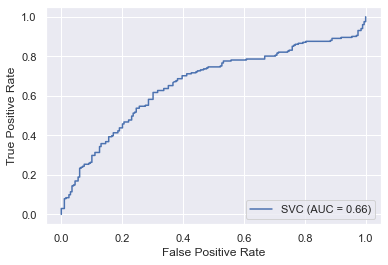

In [121]:
metrics.plot_roc_curve(svclassifier, X_test, y_test)